# Classification/Regression

## Task 1

### Linear Regression
#### Data reading & plotting

In [1]:
import pandas as pd
import warnings

# Some commands may cause warnings, so one may hide them
warnings.filterwarnings('ignore')

df = pd.read_csv('task1_data.csv')

In [2]:
X_train, y_train, X_test, y_test = df.X_train, df.y_train, df.X_test, df.y_test

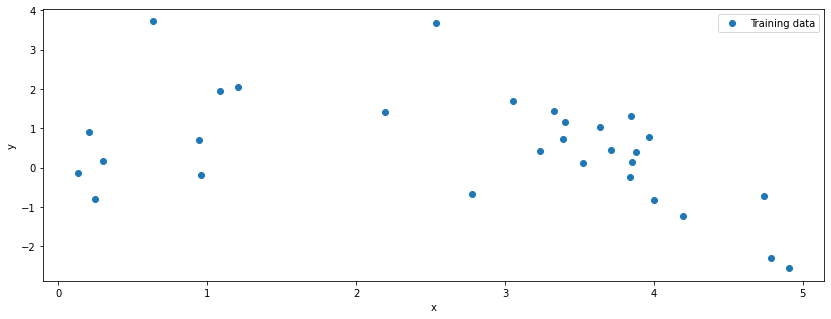

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Training data is plotted by scatter plot
plt.scatter(x = X_train, y = y_train, label = 'Training data')

plt.xlabel("x")
plt.ylabel("y")
plt.legend(['Training data'], loc="best")

plt.show()

#### Linear regression model fitting

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Creating Linear regression model and fitting it by training data 
linear = LinearRegression()
linear.fit(np.array(X_train).reshape(-1,1), y_train)

LinearRegression()

#### Linear regression model prediction & Evaluation


In [5]:
from sklearn import metrics
import math

# Predicting values for test data by trained linear regression model
y_pred_lr = linear.predict(np.array(X_test).reshape(-1,1))

def print_metrics(y_actual, y_pred):
    """
        Evaluate the performance of a model while printing MAE, MSE, RMSE and R2 metrics
        
        :param y_actual: Actual targets from the test set
        :param y_pred: Values predicted by the model
    """
    print("Mean Absolute Error: ", metrics.mean_absolute_error(y_actual, y_pred))
    print("Mean Squared Error: ", metrics.mean_squared_error(y_actual, y_pred))
    print("Root Mean Squared Error: ", math.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
    print("R2 score: ", metrics.r2_score(y_actual, y_pred))

In [6]:
print_metrics(y_test, y_pred_lr)

Mean Absolute Error:  0.7837610302414408
Mean Squared Error:  0.78105677092199
Root Mean Squared Error:  0.8837741628504365
R2 score:  0.2609450135378707


#### Plotting original data and prediction


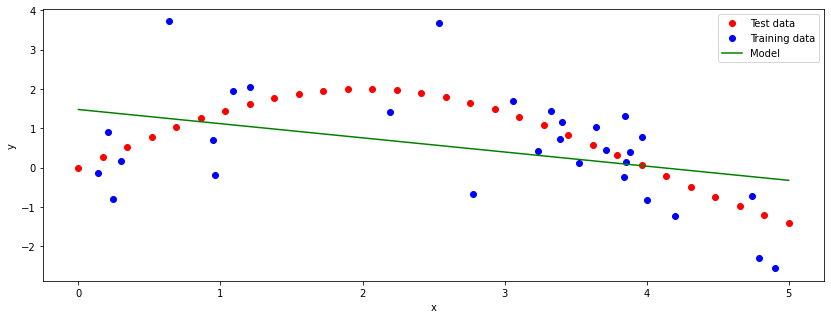

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Training and test data are plotted by scatter plot, model is plotted by simple plot
plt.scatter(x = X_test, y = y_test, label = 'Test data', color = "red")
plt.scatter(x = X_train, y = y_train, label = 'Training data', color="blue")
plt.plot(X_test, y_pred_lr, label="Model", color="green")

plt.xlabel("x")
plt.ylabel("y")

plt.legend(['Test data', 'Training data', 'Model'], loc="best")

plt.show()

#### Did the linear regression model give a good fit? Elaborate your answer

Linear regression gives a poor fit for this dataset. The error values are quite high (MSE = 0.78) and R2 score is low (R2 = 0.26). 

Also, one can notice from the plot that the green line poorly describes both training and test sets (blue and red dots).

### Polynomial Regression
#### Constructing the polynomial regression pipeline

In [8]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [9]:
# Creating a Pipleine with Linear regression and Polynomial regression classes
# in order to use Polynomial regression method
polynomial_features = PolynomialFeatures()
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

#### Tuning the degree hyper-parameter using GridSearch

In [10]:
from sklearn.model_selection import GridSearchCV

# As Polynomial regression has one hyperparameter (degree of polynomial), 
# one could tune it by Grid search method
degrees = list(range(2,10))
parameters = dict(polynomial_features__degree = degrees)

search = GridSearchCV(pipeline, param_grid=parameters, cv=8, scoring="neg_mean_squared_error")

x = cross_val_score(search, np.array(X_train).reshape(-1, 1), y_train,
                             scoring="neg_mean_squared_error", cv=8)

# Best score and degree of the polynomial
search.fit(np.array(X_train).reshape(-1, 1), y_train)
print("Best parameter (CV score = %0.3f):" % -x.mean())
best_degree_grid = search.best_params_
print(best_degree_grid)

Best parameter (CV score = 1.078):
{'polynomial_features__degree': 2}


In [11]:
# Predicting targets on a model with best parameters
y_pred_grid = search.predict(np.array(X_test).reshape(-1, 1))
print_metrics(y_test, y_pred_grid)

Mean Absolute Error:  0.15213273421671702
Mean Squared Error:  0.08205877217938008
Root Mean Squared Error:  0.2864590235607531
R2 score:  0.9223539862658872


#### Manually finding the best degree

In [12]:
# Tuning degrees for Polynomial regression manually 
# using Pipeline (Polynomial features + Linear regression)
scores = np.array([])
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(np.array(X_train).reshape(-1, 1), y_train)
    # Evaluation of the pipeline
    x = cross_val_score(pipeline, np.array(X_train).reshape(-1, 1), y_train,
                             scoring="neg_mean_squared_error", cv=8)  
    y_pred = pipeline.predict(np.array(X_test).reshape(-1, 1))
    scores = np.append(scores, -x.mean())

# Best degree of the polynomial
best_degree_manually = degrees[np.argmin(scores)]
print("Best degree (found manually): ",best_degree_manually)

Best degree (found manually):  2


#### Plotting the test data and the best degree polynomial model

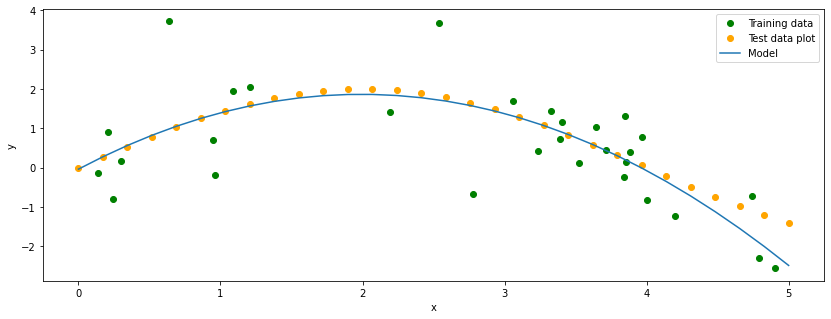

In [13]:
plt.figure(figsize=(14, 5))

# Training and test data are plotted by scatter plot, model is plotted by simple plot
plt.scatter(x = X_train, y = y_train, label = 'Training data', color="green")
plt.scatter(X_test, y_test, label="Test data plot", color="orange")
plt.plot(X_test, y_pred_grid, label="Model")

plt.xlabel("x")
plt.ylabel("y")

plt.legend(['Training data', 'Test data plot', 'Model'], loc="best")
plt.show()

Polynomial Regression model fits data better, than Linear Regression model. It's visible by metrics and the plot.

## Task 2

### Data processing
#### Loading the dataset

In [14]:
import pandas as pd

df = pd.read_csv('pokemon_modified.csv')

# Counting the number of unique values for some features to decide which are redundant
print("All classes (classification):", df['classification'].count())
print("Unique classes (classification):", len(df['classification'].unique()))

print("All classes (name):", df['name'].count())
print("Unique classes (name):", len(df['name'].unique()))

print("All classes (type1):", df['type1'].count())
print("Unique classes (type1):", len(df['type1'].unique()))

All classes (classification): 801
Unique classes (classification): 588
All classes (name): 801
Unique classes (name): 801
All classes (type1): 801
Unique classes (type1): 17


#### Remove the 2 redundant features

The dataset has 3 categorical features, however only 1 of them should be encoded. So, 2 of them should be removed.

Feature "classification" has only 588 unique values out of 801. 

In addition, Pokemon have unique "name". 

Therefore, it is doubtful that these features will have any effect on the classification result, and by using one-hot encoding will create to many additional features. That's why they will be removed.

In [15]:
X = df.drop(['is_legendary', 'name', 'classification'], axis=1)

y = df['is_legendary']

#### Splitting the data
random_state = 123, use stratify, test_size = 0.2

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=np.array(y))

Check if the dataset is balanced or not and comment on it

In [17]:
# Checking whether the data is balanced by identifying 
# percentage of positive and negative samples in training and test sets
print("%0.3f%% of positive samples in training set\n" % float(y_train.sum()/len(y_train.index)*100))
print("%0.3f%% of positive samples in test set\n" % float(y_test.sum()/len(y_test.index)*100))
print("%0.3f%% of negative samples in training set\n" % float((len(y_train.index)-y_train.sum())/len(y_train.index)*100))
print("%0.3f%% of negative samples in test set" % float((len(y_test.index)-y_test.sum())/len(y_test.index)*100))

8.750% of positive samples in training set

8.696% of positive samples in test set

91.250% of negative samples in training set

91.304% of negative samples in test set


The dataset is imbalanced. Training and test sets have approximately same number of positive samples, but number of positive samples is small in comparison to negative samples in same sets.

#### Exploring the dataset and checking for missing values

In [18]:
print("X_train:\n", X_train.head(5))
print("\n\nX_test:\n", X_test.head(5))

X_train:
      against_bug  against_dark  against_dragon  against_electric  \
564          1.0           1.0             1.0               2.0   
493          1.0           2.0             1.0               1.0   
70           1.0           1.0             1.0               0.5   
240          1.0           1.0             1.0               1.0   
749          1.0           1.0             1.0               0.0   

     against_fairy  against_fight  against_fire  against_flying  \
564            1.0            2.0          0.25             0.5   
493            0.5            0.5          0.50             1.0   
70             0.5            0.5          2.00             2.0   
240            1.0            2.0          1.00             1.0   
749            1.0            1.0          1.00             1.0   

     against_ghost  against_grass  ...  experience_growth  height_m   hp  \
564            1.0           4.00  ...            1000000       1.2   74   
493            2.0        

In [19]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 564 to 693
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        640 non-null    float64
 1   against_dark       640 non-null    float64
 2   against_dragon     640 non-null    float64
 3   against_electric   640 non-null    float64
 4   against_fairy      640 non-null    float64
 5   against_fight      640 non-null    float64
 6   against_fire       640 non-null    float64
 7   against_flying     640 non-null    float64
 8   against_ghost      640 non-null    float64
 9   against_grass      640 non-null    float64
 10  against_ground     640 non-null    float64
 11  against_ice        640 non-null    float64
 12  against_normal     640 non-null    float64
 13  against_poison     640 non-null    float64
 14  against_psychic    640 non-null    float64
 15  against_rock       640 non-null    float64
 16  against_steel      640 n

Some of the features (height_m, percentage_male, weight_kg) have missing values. For these features, the number of "non-null" values is less than for the others.

#### Impute the missing values

In [20]:
from sklearn.impute import SimpleImputer

# Since there are null values, one must impute data
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

#### Double check that there are no missing values

In [21]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   against_bug        640 non-null    object
 1   against_dark       640 non-null    object
 2   against_dragon     640 non-null    object
 3   against_electric   640 non-null    object
 4   against_fairy      640 non-null    object
 5   against_fight      640 non-null    object
 6   against_fire       640 non-null    object
 7   against_flying     640 non-null    object
 8   against_ghost      640 non-null    object
 9   against_grass      640 non-null    object
 10  against_ground     640 non-null    object
 11  against_ice        640 non-null    object
 12  against_normal     640 non-null    object
 13  against_poison     640 non-null    object
 14  against_psychic    640 non-null    object
 15  against_rock       640 non-null    object
 16  against_steel      640 non-null    object
 1

All features have equal number of non-null values, so there are no missing values.

#### Encode categorically

In [22]:
def one_hot_features(frame, name, encoder):
    """
        Encoding features by one-hot encoding method
        
        :param frame: Pandas dataframe with features
        :param name: Name of the features to be encoded
        :param encoder: Object of OneHotEndcoder class
        :return: Pandas dataframe with features encoded by one-hot encoder
    """
    
    new_frame = pd.concat([frame, 
                        pd.DataFrame(encoder.transform(frame[name]), 
                                     columns=encoder.get_feature_names_out(name))], axis=1)    
    return new_frame.drop(name, axis=1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Encoding categorical features by one hot encoding
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown = 'ignore')
encoder.fit(X_train[['type1']])
X_train = one_hot_features(X_train, ['type1'], encoder)
X_test = one_hot_features(X_test, ['type1'], encoder)

#### Scale the data

In [24]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# To normalize the data (make it in interval [0;1]), one might scale it
scaler = MinMaxScaler()
scaler.fit(X_train)
x_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

x_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.2,0.200000,0.5,0.500,0.200000,0.500,0.000000,0.066667,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.466667,0.5,0.250,0.066667,0.125,0.066667,0.200000,0.50,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.200000,0.5,0.250,0.200000,0.500,0.200000,0.200000,0.00,0.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.200000,0.5,0.000,0.200000,0.250,0.200000,0.200000,0.25,0.466667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.2,0.200000,0.5,0.250,0.200000,0.500,0.066667,0.066667,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
636,0.2,0.200000,0.5,0.500,0.200000,0.250,0.066667,0.200000,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.2,0.200000,0.5,0.000,0.200000,0.125,0.466667,0.466667,0.25,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Confusion Matrix

Are there highly co-related features in the dataset? Is it a problem?

<AxesSubplot:>

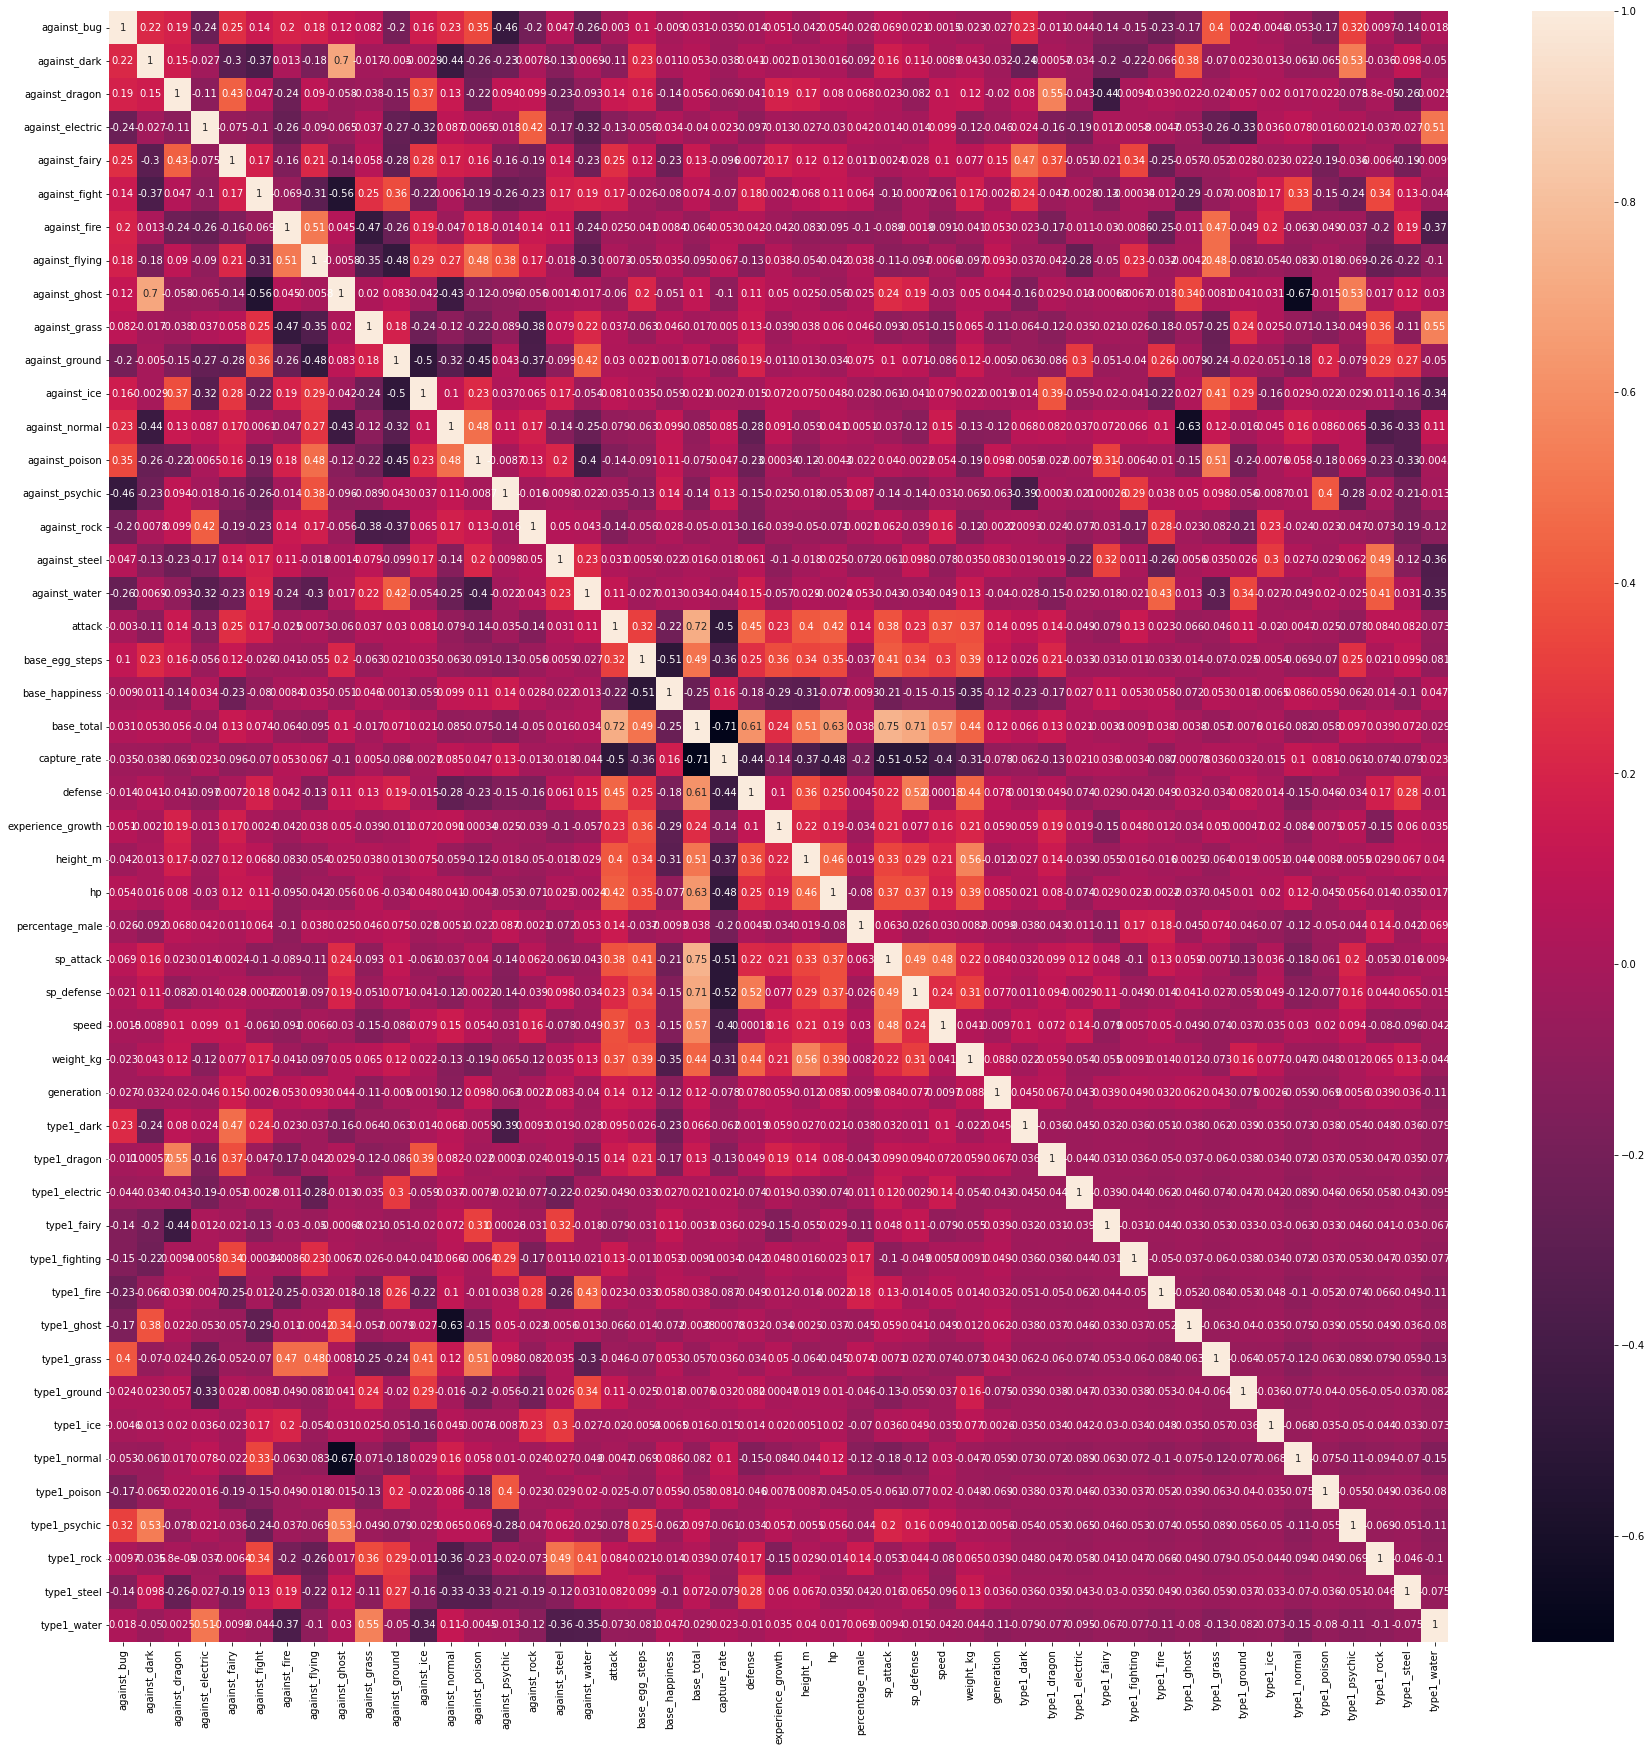

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
sns.heatmap(x_train.corr(), annot=True)

The absolute value of correlation for some features is at most 0.75 (quite high). However, removing them does not guarantee that metrics of a particular model will be better, because we may lose some useful information. It may cause some problems, so I'll leave them.

Maybe to answer this question more properly it's better to train model with and without those features to check whether those are useless.

### Model fitting and Comparison

#### Tuning LR model

In [26]:
def print_clf_metrics(y_actual, y_pred):
    """
        Evaluate the performance of a model while printing 
        Accuracy, Precision, Recall and F1 scores
        
        :param y_actual: Actual target from the test set
        :param y_pred: Value predicted by the model
    """
    
    print(f'Testing accuracy = {metrics.accuracy_score(y_actual, y_pred)}')
    print(f'Testing precision = {metrics.precision_score(y_actual, y_pred)}')
    print(f'Testing recall = {metrics.recall_score(y_actual, y_pred)}')
    print(f'Testing F1-score = {metrics.f1_score(y_actual, y_pred)}')

In [27]:
# hyper-parameters of LR to be tuned
parameters = {'penalty': ['l1','l2'], 'C': np.logspace(-3,3,7), 'solver': ['newton-cg', 'lbfgs', 'liblinear']}

max_iter=1000 in LR constructor

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Using of Grid search to find best parameters for Logistic Regression
gs_clf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=parameters)

In [29]:
gs_clf.fit(x_train, y_train)
y_pred = gs_clf.predict(x_test)

In [30]:
print("Tuned Hyperparameters :", gs_clf.best_params_)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9937888198757764


#### Construct a LR with the best params and Evaluate the LR with the best params

In [31]:
# Creating the Logistic regression with best parameters, 
# fitting it on training data and predicting values on test data 

lr_clf = LogisticRegression(C=gs_clf.best_params_['C'], 
                            penalty=gs_clf.best_params_['penalty'], 
                            solver=gs_clf.best_params_['solver'])
lr_clf.fit(x_train, y_train)
y_pred = lr_clf.predict(x_test)
print_clf_metrics(y_test, y_pred)

Testing accuracy = 0.9937888198757764
Testing precision = 0.9333333333333333
Testing recall = 1.0
Testing F1-score = 0.9655172413793104


In [32]:
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

conf_matrix = confusion_matrix(y_test, y_pred)
table = [["", "Positive", "Negative"],["Positive"],["Negative"]]
for i in range(len(conf_matrix)):
    table[i+1] = np.append(table[i+1], conf_matrix[i])


print(tabulate(table, headers='firstrow', tablefmt='grid'))

+----------+------------+------------+
|          |   Positive |   Negative |
+==========+============+============+
| Positive |        146 |          1 |
+----------+------------+------------+
| Negative |          0 |         14 |
+----------+------------+------------+


#### Print the top 5 most influencing features and the top 5 ignored features

In [33]:
# Searching for most and least influencing features
# Most influencing features are considered by absolute value of its coefficient
d = {}
for i,j in np.c_[np.array(x_train.columns).reshape(-1,1),np.array(lr_clf.coef_).reshape(-1,1)]:
    d[i] = j

d = {k: v for k, v in sorted(d.items(), key=lambda item: abs(item[1]))}

print("Most influencing features:")
for i in range(5):
    print(list(d.keys())[-(i+1)], "-",list(d.values())[-(i+1)])
print()

print("Least influencing features:")
for i in range(5):
    print(list(d.keys())[i], "-",list(d.values())[i])

Most influencing features:
base_egg_steps - 13.514450008370256
capture_rate - -10.601090243275145
type1_normal - -9.631332584211366
base_total - 7.4718924250988765
experience_growth - 6.945581417122843

Least influencing features:
against_bug - 0.0
against_dark - 0.0
against_electric - 0.0
against_fairy - 0.0
against_fire - 0.0


#### Tuning KNN model

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Using of Grid search to find best parameters for K-Nearest-Neighbours
param_grid = {'n_neighbors':list(range(1, 15)),
              'weights':['uniform', 'distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
              }

grid_search_clf = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)

grid_search_clf.fit(x_train, y_train)

y_pred = grid_search_clf.predict(x_test)

print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Tuned Hyperparameters : {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.9751552795031055


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [35]:
# Creating the KNN with best parameters, 
# fitting it on training data and predicting values on test data
knn = KNeighborsClassifier(metric=grid_search_clf.best_params_['metric'], 
                           n_neighbors=grid_search_clf.best_params_['n_neighbors'], 
                           weights=grid_search_clf.best_params_['weights'])
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print_clf_metrics(y_test, y_pred)

Testing accuracy = 0.9751552795031055
Testing precision = 1.0
Testing recall = 0.7142857142857143
Testing F1-score = 0.8333333333333333


In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
table = [["", "Positive", "Negative"],["Positive"],["Negative"]]
for i in range(len(conf_matrix)):
    table[i+1] = np.append(table[i+1], conf_matrix[i])


print(tabulate(table, headers='firstrow', tablefmt='grid'))

+----------+------------+------------+
|          |   Positive |   Negative |
+==========+============+============+
| Positive |        147 |          0 |
+----------+------------+------------+
| Negative |          4 |         10 |
+----------+------------+------------+


#### Fitting GNB to the data and evaluating on the test dataset

In [37]:
from sklearn.naive_bayes import GaussianNB

# Creating the Naive Bayes model, 
# fitting it on training data, 
# predicting values on test data and evaluating metrics
gauss_nb = GaussianNB()
gauss_nb.fit(x_train, y_train)
y_pred = gauss_nb.predict(x_test)

print_clf_metrics(y_test, y_pred)

Testing accuracy = 0.8695652173913043
Testing precision = 0.4
Testing recall = 1.0
Testing F1-score = 0.5714285714285715


In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
table = [["", "Positive", "Negative"],["Positive"],["Negative"]]
for i in range(len(conf_matrix)):
    table[i+1] = np.append(table[i+1], conf_matrix[i])


print(tabulate(table, headers='firstrow', tablefmt='grid'))

+----------+------------+------------+
|          |   Positive |   Negative |
+==========+============+============+
| Positive |        126 |         21 |
+----------+------------+------------+
| Negative |          0 |         14 |
+----------+------------+------------+


#### Which metric is most appropriate for this task and why?

The dataset is imbalanced, as it has different proportion of different classes, so accuracy is not good metric. 

It seems that this task has no significant semantic difference between positive and negative (legendary and non-legendary) items. Therefore, the cost of false positives is approximately the same as the cost of false negatives. So, precision and recall importance are equal.

For this reason, F1 can be considered as the most appropriate metric for comparing these models as the goodness (mean) of precision and recall.

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? and based on what
did you pick it?

In [39]:
table = [['Algorithm', 'Accuracy', 'Precision',
         'Recall', 'F1']]

algorithm_titles = ['Logistic Regression', 'KNN', 'Naive Bayes']

clfs = [lr_clf, knn, gauss_nb]

# Comparing in table format metrics of three models
for i in range(len(algorithm_titles)):
    tmp = []
    tmp.append(algorithm_titles[i])
    tmp.append(metrics.accuracy_score(y_test, clfs[i].predict(x_test)))
    tmp.append(metrics.precision_score(y_test, clfs[i].predict(x_test)))
    tmp.append(metrics.recall_score(y_test, clfs[i].predict(x_test)))
    tmp.append(metrics.f1_score(y_test, clfs[i].predict(x_test)))
    table.append(tmp)
    
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+---------------------+------------+-------------+----------+----------+
| Algorithm           |   Accuracy |   Precision |   Recall |       F1 |
+=====================+============+=============+==========+==========+
| Logistic Regression |   0.993789 |    0.933333 | 1        | 0.965517 |
+---------------------+------------+-------------+----------+----------+
| KNN                 |   0.975155 |    1        | 0.714286 | 0.833333 |
+---------------------+------------+-------------+----------+----------+
| Naive Bayes         |   0.869565 |    0.4      | 1        | 0.571429 |
+---------------------+------------+-------------+----------+----------+


Based on the F1 score one can conclude that for this task the best model is a Logistic regression.

## Bonus Task

#### Loading the Dataset

In [40]:
import pandas as pd

train_data = pd.read_csv('bonus_train.csv')
test_data = pd.read_csv('bonus_test.csv')

train_data

,var1,var2,var3,target
0,63.973548,2.726496,379.882305,2
1,10.906092,5.529845,207.272945,1
2,73.482382,2.739803,335.491727,1
3,28.937856,3.666386,226.279807,0
4,33.315477,5.540084,159.608987,0
...,...,...,...,...
265,87.227771,3.738061,320.135382,2
266,-4.605994,3.688628,204.136303,1
267,44.178216,5.085936,198.365089,0
268,6.169277,3.328219,204.934675,0


In [41]:
X_train = train_data.drop("target", axis=1)
y_train = pd.DataFrame(train_data["target"])

X_test = test_data.drop("target", axis=1)
y_test = test_data["target"]

print("X_train\n", X_train.head(5), 
      "\n\ny_train\n", y_train.head(5), 
      "\n\nX_test\n", X_test.head(5), 
      "\n\ny_test\n", y_test.head(5))

X_train
         var1      var2        var3
0  63.973548  2.726496  379.882305
1  10.906092  5.529845  207.272945
2  73.482382  2.739803  335.491727
3  28.937856  3.666386  226.279807
4  33.315477  5.540084  159.608987 

y_train
    target
0       2
1       1
2       1
3       0
4       0 

X_test
         var1      var2        var3
0  26.052523  4.698298  239.765969
1  62.205061  4.373559  207.581273
2  11.390621  4.494386  244.578095
3  35.320556  2.731171  322.284266
4  53.508643  3.575985  247.902236 

y_test
 0    1
1    1
2    0
3    2
4    1
Name: target, dtype: int64


####  Plot the data using the pairplot in sns

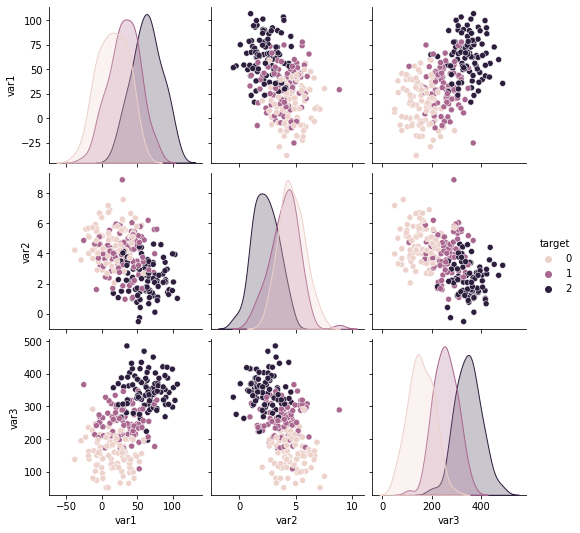

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train_data, kind="scatter", hue="target")

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [43]:
multi_lr = LogisticRegression(multi_class = "ovr")
multi_lr.fit(X_train, y_train)
y_pred = multi_lr.predict(X_test)

In [44]:
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.8


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [45]:
multi_lr = LogisticRegression(multi_class = "multinomial")
multi_lr.fit(X_train, y_train)
y_pred = multi_lr.predict(X_test)

In [46]:
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.9


#### Using gridsearch to tune the C value and multi class

In [47]:
params = {'C':np.logspace(-10, 10,7),
              'multi_class':['multinomial', 'ovr']
              }

In [48]:
grid_search_clf = GridSearchCV(LogisticRegression(), param_grid=params)

grid_search_clf.fit(X_train, y_train)
y_pred = grid_search_clf.predict(X_test)

In [49]:
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Tuned Hyperparameters : {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
Accuracy : 0.8666666666666667


#### Comment on why one multi_class technique was better than the other

Multinomial Logistic Regression is better than One-vs-Rest. Multinomial technique models the entire distribution for all classes at once, using the softmax function, unlike One-vs-Rest, where each class is defined by only individual probability distribution.

#### Create LR with the best params

In [50]:
multi_lr = LogisticRegression(multi_class = grid_search_clf.best_params_["multi_class"],
                             C=grid_search_clf.best_params_["C"])

#### Visualize the decision boundaries

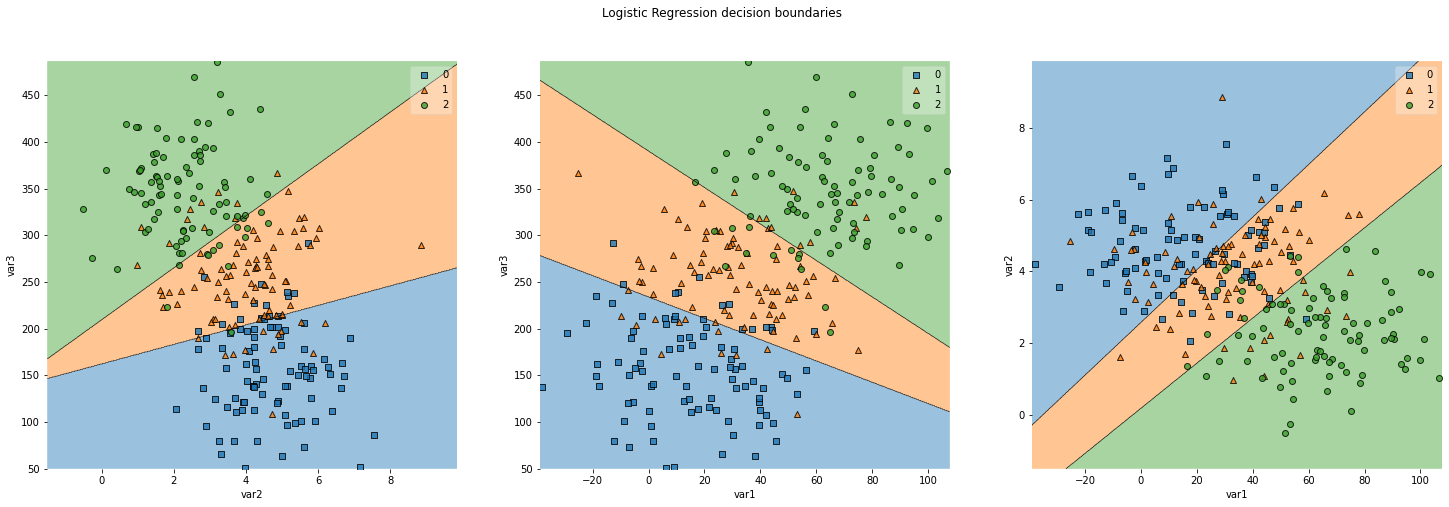

In [51]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(25, 7.5))

# Plotting the 2D-plots of the training set and decision boundaries
# of the model with best parameters.
# Three plots are displayed because sequentially dropped 1 feature from the set of features.
features = np.array(['var1', 'var2', 'var3'])
for i in range(len(features)):
    X = X_train.drop(features[i], axis=1)
    multi_lr = LogisticRegression(multi_class = grid_search_clf.best_params_["multi_class"],
                                 C=grid_search_clf.best_params_["C"])
    multi_lr.fit(X, y_train)
    plt.subplot(131+i)
    plot_decision_regions(np.array(X), np.array(y_train).reshape(-1,), clf=multi_lr)
    features_copy = features.copy()
    plt.xlabel(np.delete(features_copy,i)[0])
    plt.ylabel(np.delete(features_copy,i)[1])
    
plt.suptitle('Logistic Regression decision boundaries')
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?

The accuracy of this model is not very high (0.87). In addition, the different classes are quite strongly mixed, so it is impossible to separate them with decision boundaries precisely.